# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
#1
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
#2
D = np.diag([1, 2, 3, 4, 5])
print(D)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [ ]:
#3
trace_D = np.trace(D)
print(trace_D)

15


In [ ]:
#4
inv_D = np.linalg.inv(D)
print(inv_D)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [ ]:
#5
X = np.random.rand(4, 5)
print(X)

[[0.85813375 0.31783936 0.57827872 0.72266882 0.26049543]
 [0.88129932 0.10744344 0.51902124 0.34597337 0.84192668]
 [0.62364301 0.78340103 0.17951288 0.98040406 0.04009807]
 [0.55929042 0.89638906 0.17500001 0.31547505 0.42125813]]


In [ ]:
#6
minor_X = X[1:3, 0:2]
det_minor_X = np.linalg.det(minor_X)
print(det_minor_X)

0.6234044390732398


In [ ]:
#7
X_transpose = X.T
XTX = np.dot(X_transpose, X)
print(XTX)

[[2.2148184  1.35734291 1.16348134 1.71291691 1.22614185]
 [1.35734291 1.52979647 0.53706384 1.3177031  0.58227926]
 [1.16348134 0.53706384 0.66663921 0.82867482 0.66853509]
 [1.71291691 1.3177031  0.82867482 1.70266442 0.65174488]
 [1.22614185 0.58227926 0.66853509 0.65174488 0.95576467]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [66]:
def my_det(X):
    X = np.array(X)
    X = X.astype(np.float128)
    n, m = X.shape
    if n != m:
        raise ValueError

    sign = 1

    for i in range(n):
        if X[i, i] == 0:
            for j in range(i + 1, n):
                if X[j, i] != 0:
                    X[[i, j]] = X[[j, i]]
                    sign *= -1
                    break
            else:
                return 0
        for j in range(i + 1, n):
            if X[j, i] != 0:
                factor = X[j, i] / X[i, i]
                X[j, i:] -= factor * X[i, i:]

    det = sign
    for i in range(n):
        det *= X[i, i]

    return det

Простая проверка:

In [48]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [70]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.2 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
200 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
108 µs ± 8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.4 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
41.4 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.36 s ± 536 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


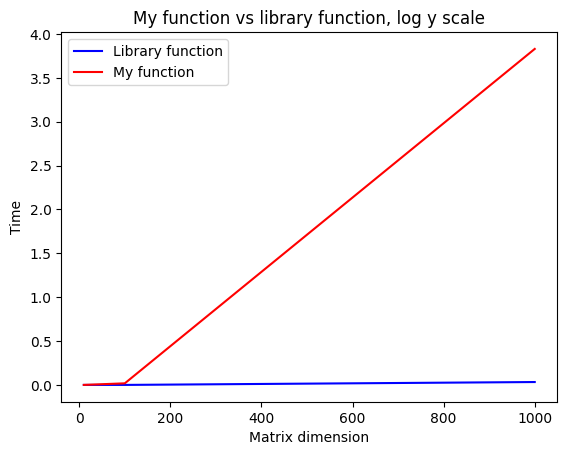

In [71]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

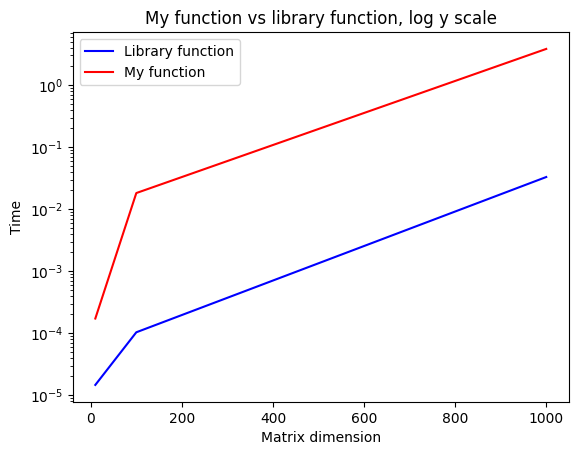

In [72]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [76]:
A = np.array([[1, 0], [10 ** (20), 1]])
B = np.array([[10 ** (-20), 1], [0, 1 - 10 ** (20)]])
print(A.dot(B))
A = np.array([[1., 0.], [10. **(20), 1.]])
B = np.array([[10.**(-20), 1.], [0., 1. - 10. ** (20)]])
print(A.dot(B))


[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**
$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
=\begin{pmatrix}
1*10^{-20} & 1\\
10^{20}*10^{-20} & 10^{20}+1-10^{20}
\end{pmatrix}
=\begin{pmatrix}
10^{-20} & 1\\
1 & 1
\end{pmatrix}
$

То есть, правильный ответ при арифметике целых чисел.

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [93]:
def my_pascal(dim):
    P = np.zeros((dim, dim), dtype=int)
    for i in range(0, dim):
        P[0][i] = 1
        P[i][0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i - 1, j] + P[i, j - 1]
    return P
print(my_pascal(10))
print(my_det(my_pascal(10)))

[[    1     1     1     1     1     1     1     1     1     1]
 [    1     2     3     4     5     6     7     8     9    10]
 [    1     3     6    10    15    21    28    36    45    55]
 [    1     4    10    20    35    56    84   120   165   220]
 [    1     5    15    35    70   126   210   330   495   715]
 [    1     6    21    56   126   252   462   792  1287  2002]
 [    1     7    28    84   210   462   924  1716  3003  5005]
 [    1     8    36   120   330   792  1716  3432  6435 11440]
 [    1     9    45   165   495  1287  3003  6435 12870 24310]
 [    1    10    55   220   715  2002  5005 11440 24310 48620]]
1.0


Доказательство по индукции, что определитель матрицы Паскаля равен 1

Базовый случай: n = 1 : Когда n = 1 , матрица Паскаля представляет собой единственный элемент: P_1 = [1].
Определитель этой матрицы равен 1.


Шаг индукции: Предположим, что для матрицы Паскаля размерности n = n её определитель равен 1, то есть: det(P_n) = 1


Теперь рассмотрим матрицу Паскаля размерности n+1, элементы которой задаются биномиальными коэффицентами:



А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [83]:
P = my_pascal(30)
print(np.linalg.det(P))

-3.400444993542791e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [116]:
def prod_and_sq_sum(A):
    if A.shape[0] != A.shape[1]:
      raise ValueError()
    res_prod = A.diagonal().prod()
    res_sum = (A.diagonal()**2).sum()
    return res_prod, res_sum



In [117]:
# Тест
for _ in range(50):
    X = np.random.rand(50, 50)
    x, y = prod_and_sq_sum(X)
    a=1
    b=0
    for i in range(50):
      a*=X[i][i]
      b+=X[i][i]**2
    if np.abs(x-a) > 1e-6 or np.abs(y-b) > 1e-6:
        print('FAILED')

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [104]:
def f(A, B, lmbd, k):
    m = min(k, A.shape[1])
    A = A[:, :m]
    B = B[:, :m]
    lmbd = lmbd[:m]
    res = (A * lmbd.reshape((1, lmbd.shape[0]))) @ B.T
    return res

In [107]:
#Тест
A = np.random.rand(3, 4)
B = np.random.rand(3, 4)
k = np.random.randint(1, 5)
n = np.random.randint(5, 60)
lmbd = np.random.rand(n)
x = f(A, B, lmbd, k)
y = 0
m=A.shape[0]
n=A.shape[1]
for i in range(min(n, k)):
    y = y+lmbd[i]*((A[:, i].reshape(m, 1)).dot(B[:, i].reshape(1, m)))
print(y)
print(x)

[[0.21546657 0.30399739 0.25872377]
 [0.69143245 0.80557725 0.80291333]
 [0.40993779 0.56723061 0.49197489]]
[[0.21546657 0.30399739 0.25872377]
 [0.69143245 0.80557725 0.80291333]
 [0.40993779 0.56723061 0.49197489]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [109]:
def get_diag(A, B):
    res = np.sum(A * B.T, axis=1)
    return res



In [110]:
# Тест
for _ in range(50):
  A, B=np.random.rand(50, 50), np.random.rand(50, 50)
  x=get_diag(A, B)
  y=np.diag(A.dot(B))
  for i in range(len(x)):
    if np.abs(x[i]-y[i])>1e-6:
      print('FAILED')

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [147]:
def shrink_rotate(x, a, coef=1., angle=0.):
    scaled_ax = (x - a) * coef
    return (scaled_ax * (np.cos(angle) +1j * np.sin(angle)) + a)
    raise NotImplementedError()

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    scaled_ax = (x - a) * coef
    return (scaled_ax * np.exp(1j * angle)).conjugate() + a
    raise NotImplementedError()

def geometric_inverse(x, a, r):
    if x - a == 0:
       raise ValueError('Нельзя инвертировать')
    return r**2 / abs(x - a)**2 * (x - a) + a
    raise NotImplementedError()

In [148]:
import math
print(shrink_rotate(1 + 2 * 1j, 0, coef=1.0, angle=math.pi / 180 * 45.0))
print(shrink_rotate(2 + 2 * 1j, 0, coef=1.0, angle=math.pi / 180 * 90.0))
print(shrink_rotate(1, 2, coef=1.0, angle=math.pi / 180 * 90.0))
print(shrink_rotate_conj(1 + 2 * 1j, 0, coef=1.0, angle=math.pi / 180 * 45.0))
print(shrink_rotate_conj(2 + 2 * 1j, 0, coef=1.0, angle=math.pi / 180 * 90.0))
print(shrink_rotate_conj(1, 2, coef=1.0, angle=math.pi / 180 * 90.0))
print(geometric_inverse(1, 3, 1))

(-0.7071067811865474+2.121320343559643j)
(-1.9999999999999998+2j)
(2-1j)
(-0.7071067811865474-2.121320343559643j)
(-1.9999999999999998-2j)
(2+1j)
2.5


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

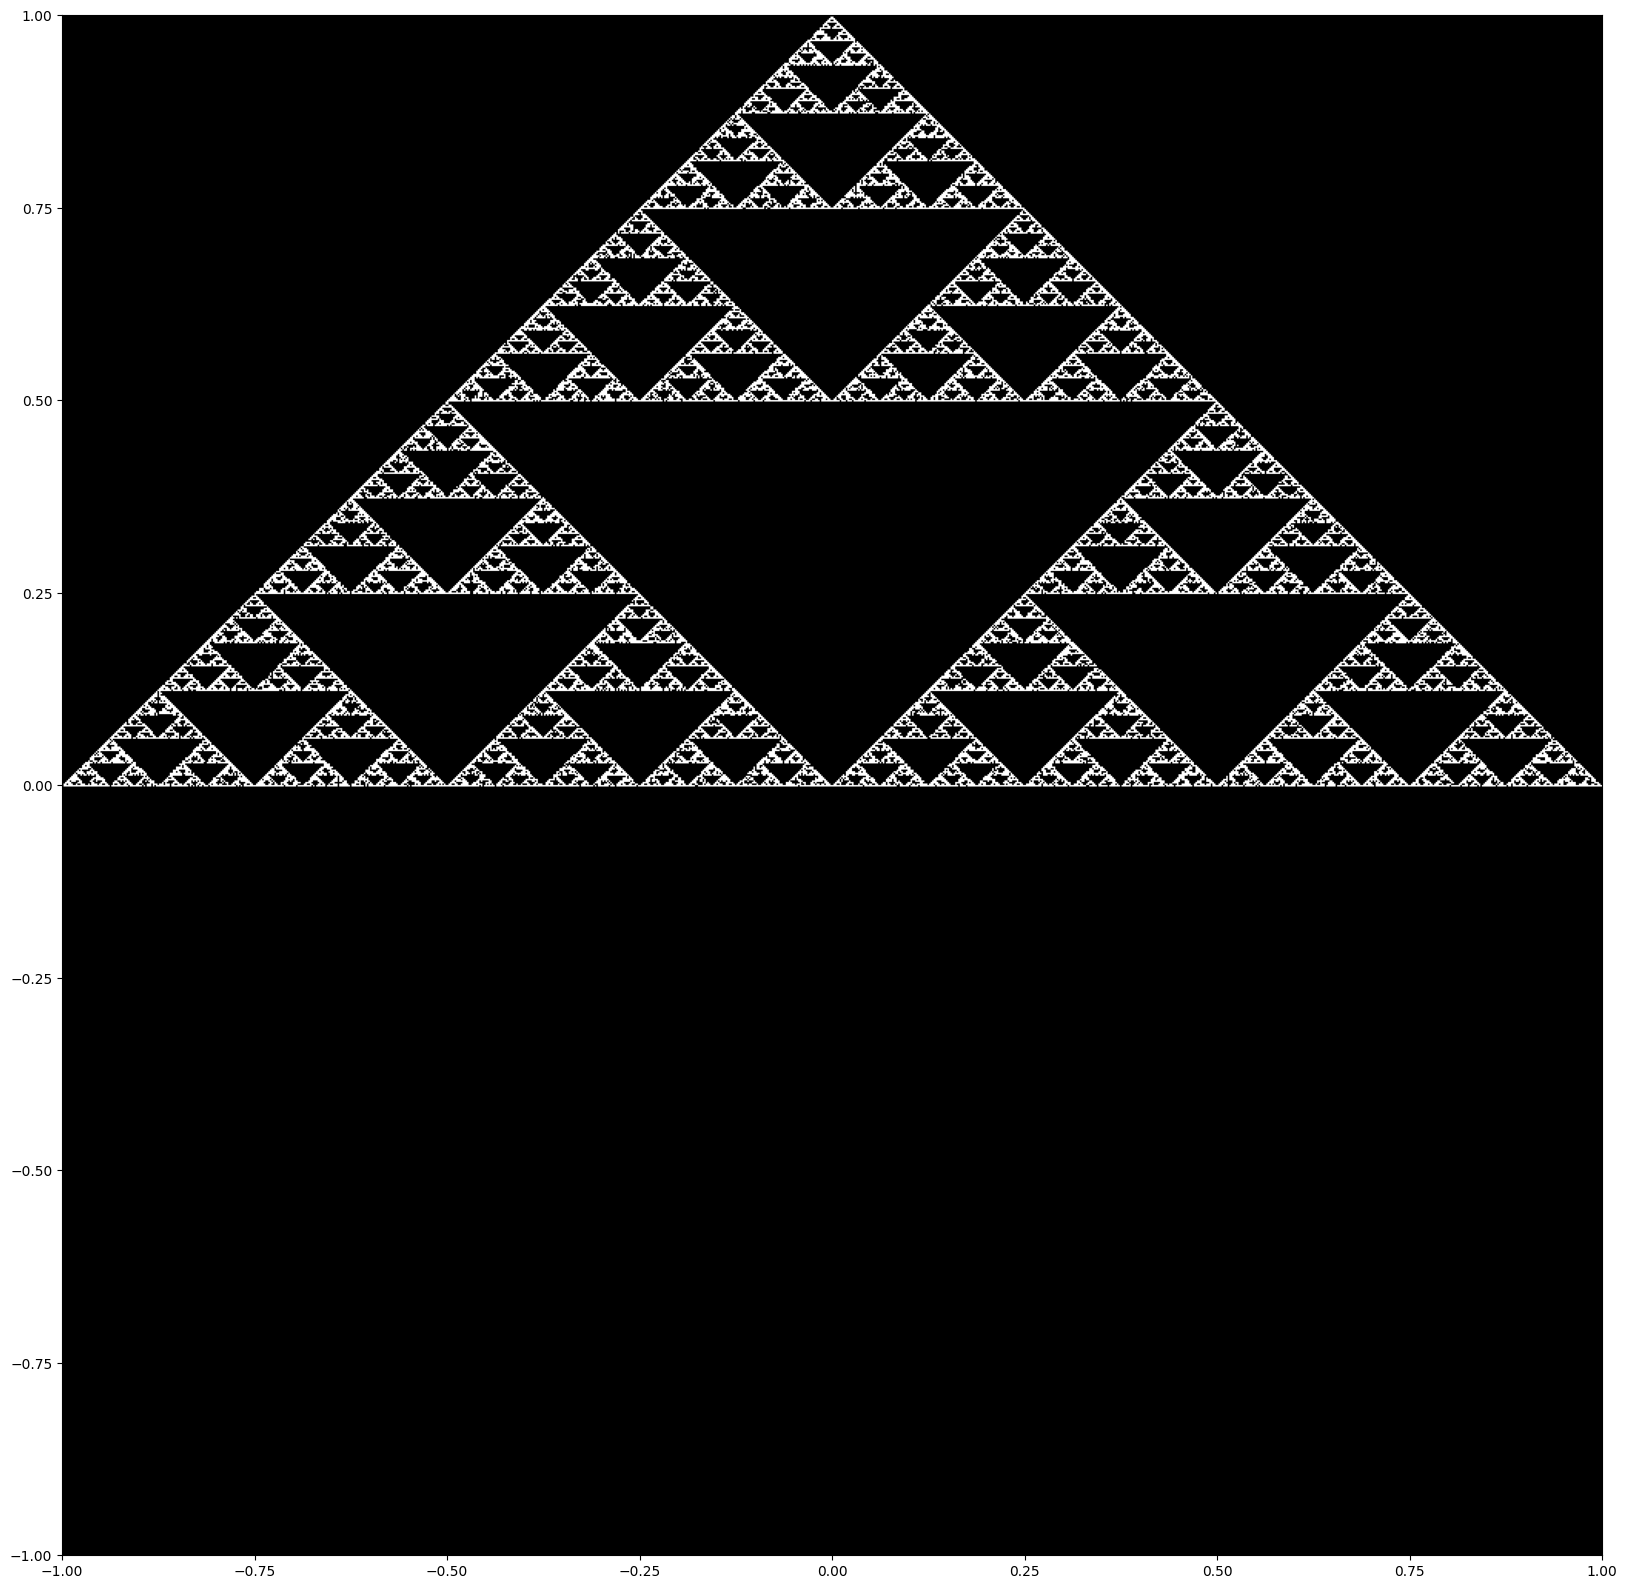

In [128]:
z = 0.5 + 0.*1j
max_iter = 100000
mat = np.zeros((1000, 1000))

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    j = int((z.real + 1) / 2 * 1000)
    i = int((z.imag + 1) / 2 * 1000)


    if 0 <= j < 1000 and 0 <= i < 1000:
        if n_iter >= 10:
            mat[-i, j] = 1




plt.figure(figsize=(20, 20))
plt.imshow(mat, cmap='gray', extent=[-1, 1, -1, 1])
plt.show()


**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

Изначально точка \( z = 0.5 + 0.0i \). На каждом шаге случайным образом выбирается одна из трёх функций, сжимающих точку к центрам \( 0 + 1i \), \( 1 + 0i \) и \( -1 + 0i \) с коэффициентом \( coef = 0.5 \). В результате точка будет приближаться к этим центрам, образуя узор в виде треугольника, так как центры расположены в вершинах равнобедренного треугольника.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

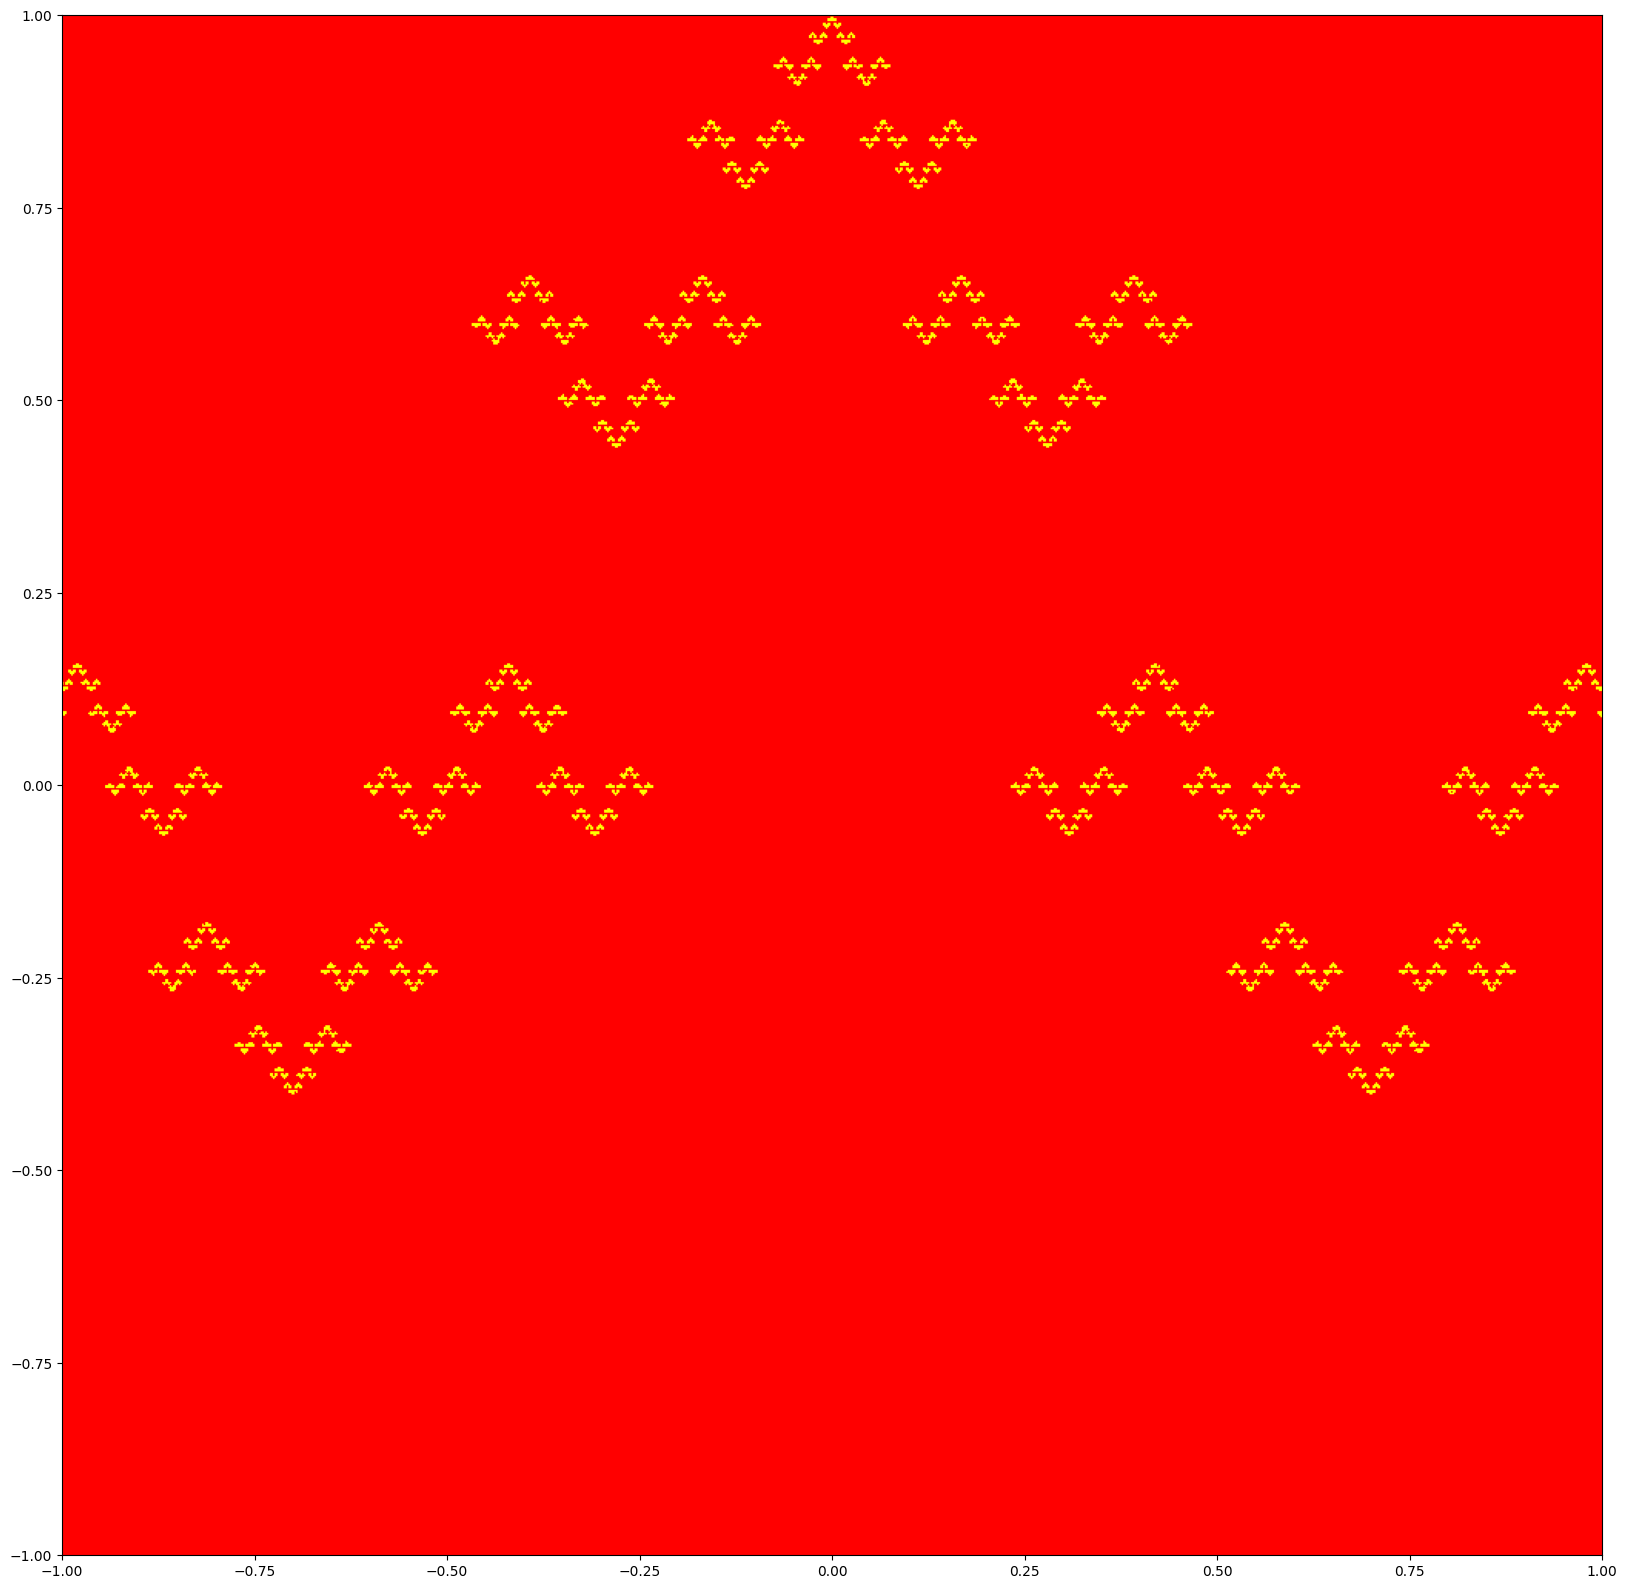

In [146]:
z = 0.5 + 0.*1j
max_iter = 100000
mat = np.zeros((1000, 1000))

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.4, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.*1j, coef=0.4, angle=np.pi)),
    (lambda t: shrink_rotate(t, -0.5 + 0.*1j, coef=-0.4, angle=0.))
]


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    j = int((z.real + 1) / 2 * 1000)
    i = int((z.imag + 1) / 2 * 1000)


    if 0 <= j < 1000 and 0 <= i < 1000:
        if n_iter >= 10:
            mat[-i, j] = 1




plt.figure(figsize=(20, 20))
plt.imshow(mat, cmap='autumn', extent=[-1, 1, -1, 1])
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

26.8 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
154 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
83 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
181 µs ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 5.39 times longer than the fastest. This could mean that an intermediate result is being cached.
884 µs ± 715 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
391 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.16 ms ± 811 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.68 ms ± 947 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.36 times longer than the fastest. This could mean that an intermediate result is being cached.
86.5 ms ± 63.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.4 ms ± 5.98 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
247 ms ± 137 ms per loop (mean ± std. dev. of 7

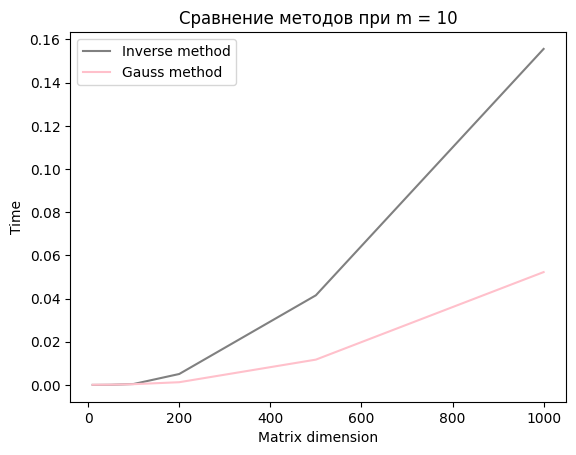

In [149]:
def inverse(A, B):
    A = sla.inv(A)
    return A @ B

def gauss(A, B):
    return sla.solve(A, B)


inverse_times = []
gauss_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for n in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, 10)
    res_inverse = %timeit -o inverse(A, B)
    inverse_times.append(res_inverse.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.plot(dimensions, inverse_times, color='grey', label='Inverse method')
plt.plot(dimensions, gauss_times, color='pink', label='Gauss method')
plt.title('Сравнение методов при m = 10')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

468 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.45 times longer than the fastest. This could mean that an intermediate result is being cached.
672 µs ± 564 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 7.07 times longer than the fastest. This could mean that an intermediate result is being cached.
2.52 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
544 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.58 times longer than the fastest. This could mean that an intermediate result is being cached.
4.29 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.35 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 5.51 times longer than the fastest. This could mean that an intermediate result is being cached.
7.43 ms ± 5.68 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.25 ms ± 127 µs per loop (m

Text(0.5, 0, 'Matrix dimension')

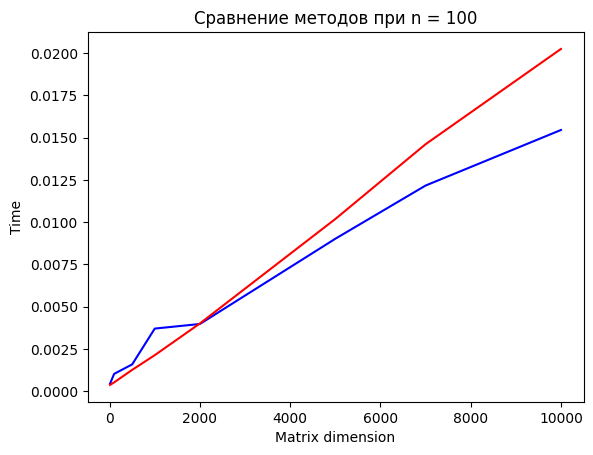

In [150]:
def inverse(A, B):
    A = sla.inv(A)
    return A @ B

def gauss(A, B):
    return sla.solve(A, B)


inverse_times = []
gauss_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 7000, 10000]
for m in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, m)
    res_inverse = %timeit -o inverse(A, B)
    inverse_times.append(res_inverse.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.plot(dimensions, inverse_times, color='blue', label='Inverse method')
plt.plot(dimensions, gauss_times, color='red', label='Gauss method')
plt.title('Сравнение методов при n = 100')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')


У метода Гаусса сложность - $O(n^{3})$, но наи приходится совершить около $n^{3} + n^{2} * m$ операций, приведение к ступенчатому виду + операции с матрицей B в ходе преобразований матрицы A.


У метода обратной матрицы сложность - $O(n^{3})$, но помимо нахождения обратной матрицы нам придется перемножать матрицы.

Поэтому при больших n нам есть смысл сразу использовать метод Гаусса, поскольку это значительно сократит количество операций.

То есть, чем больше n, тем меньше у нас займет времени, если пользоваться методом гаусса.